In [1]:
from midi_preprocessing import *

C:\Users\kriptos\miniconda3\envs\jupyter_env\lib\site-packages\pretty_midi\instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
filename = 'raw/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.midi'
midi = pretty_midi.PrettyMIDI(filename)

In [3]:
# Define the nuber of columns per bar.
COLS_PER_BAR = 16 # Found in the paper.

bar_duration = get_bar_duration(midi)
print("Bar duration =", bar_duration)

fs = COLS_PER_BAR / bar_duration
print("Sampling frequency =", fs)

Bar duration = 2.0
Sampling frequency = 8.0


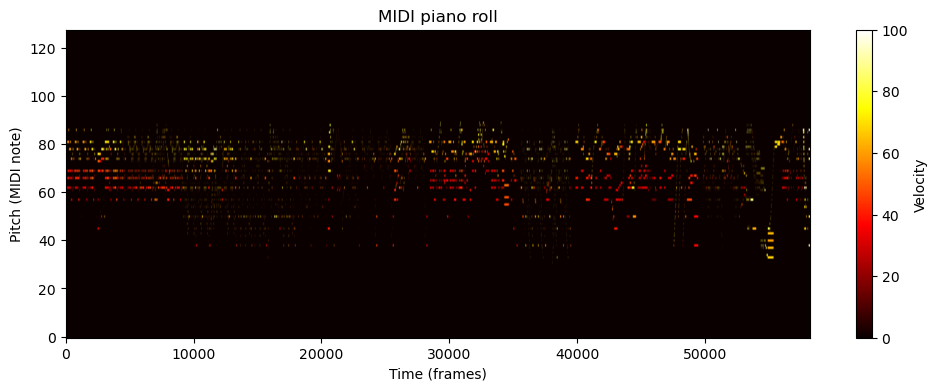

In [4]:
show_piano_roll(midi.get_piano_roll())

In [5]:
melody = extract_melody(midi, fs)
melody = normalize_melody_roll(melody, lb=60, ub=83)

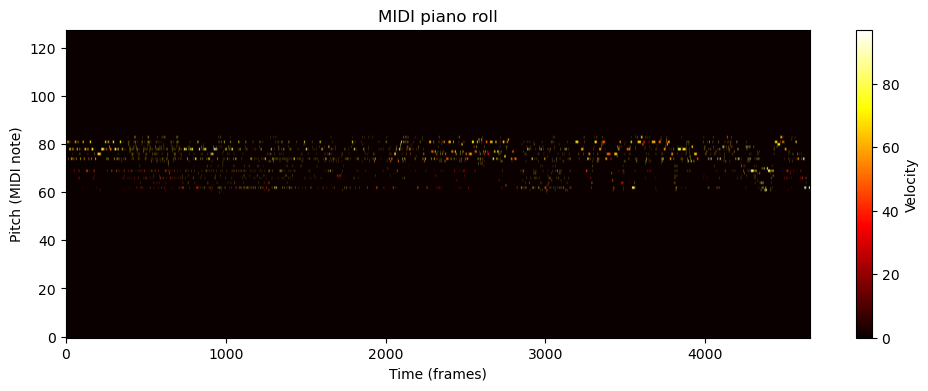

In [6]:
show_piano_roll(melody)

In [7]:
print(midi_selection(midi,fs))

print(melody_selection(melody))

True
False


In [8]:
midi = piano_roll_to_pretty_midi(melody, fs = 8)

In [9]:
print(compute_variance(midi,"velocity"))

171.68631786755583


In [10]:
import matplotlib.pyplot as plt
from typing import List, Union, Tuple

def plot_values(values: List[Union[int, float]], title: str = "Plot of Values", xlabel: str = "Index", ylabel: str = "Value"):
    """
    Generates and displays a line plot for a list of numerical values.

    This function takes a list of numbers and plots them against their indices.
    It includes basic customizations like titles and labels for clarity.

    Args:
        values (List[Union[int, float]]): A list of numbers (integers or floats) to be plotted.
        title (str, optional): The title of the plot. Defaults to "Plot of Values".
        xlabel (str, optional): The label for the x-axis. Defaults to "Index".
        ylabel (str, optional): The label for the y-axis. Defaults to "Value".
    """
    # Check if the list is empty
    if not values:
        print("Warning: The list of values is empty. Nothing to plot.")
        return

    # Create a figure and an axes object for the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the values. Matplotlib automatically uses the list indices as x-coordinates.
    plt.plot(values, marker='o', linestyle='-', color='b', label=f'{ylabel} over {xlabel}')
    
    # --- Customize the plot for better readability ---
    
    # Add a title to the plot
    plt.title(title, fontsize=16)
    
    # Add labels to the x and y axes
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    # Add a grid to make it easier to read the values
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add a legend to identify the data series
    plt.legend()
    
    # Ensure the layout is tight
    plt.tight_layout()
    
    # Display the plot
    plt.show()

import numpy as np
from typing import List, Tuple


def central_filter(
    values: List[float], 
    percentage: float = 0.8
):

    if not values:
        return [], 0, 0
    
    if not (0 < percentage <= 1.0):
        raise ValueError("The percentage to keep must be between 0 and 1.")

    # Convert the list to a NumPy array for efficient computation
    array_data = np.array(values)
    
    # Calculate the percentage to discard from each side
    percentage_to_delete = (1 - percentage) / 2.0
    
    # Calculate the lower and upper quantiles
    # e.g., for 80%, we discard 10% from the bottom (0.1 quantile) and 10% from the top (0.9 quantile)
    lb = np.quantile(array_data, percentage_to_delete)
    ub = np.quantile(array_data, 1 - percentage_to_delete)
    
    # Filter the original array to keep only the values within the range
    result = array_data[
        (array_data >= lb) & (array_data <= ub)
    ]
    
    # Convert the NumPy array back to a Python list before returning
    return result.tolist(), lb, ub

In [11]:
import pretty_midi
import os
import h5py

### GLOBAL VARIABLES ###
# Define the number of cols per bar.
COLS_PER_BAR = 16
# Define the directory of the dataset.
INPUT_DIR_PATH =[
    "./raw/maestro-v3.0.0/2018/",
#    "./raw/maestro-v3.0.0/2017/",
#    "./raw/maestro-v3.0.0/2015/",
#    "./raw/maestro-v3.0.0/2014/"
]

# Define the output directory path.
OUT_DIR_PATH = "./preprocessed/maestro-v3.0.0/dataset2/"
values_velocity = []
values_duration = []
values_pitch = []
file_names = []
midi_data = []
counter = 0
for dir in INPUT_DIR_PATH:
    for filename in os.listdir(dir):
        file_names.append(filename)
        counter += 1
        # Open the midi file.
        midi = pretty_midi.PrettyMIDI(os.path.join(dir, filename))
        midi_data.append(midi)
        # Define parameters.
        bar_duration = get_bar_duration(midi)
        fs = COLS_PER_BAR / bar_duration
        
        # Create meoldy piano roll.
        melody_roll = extract_melody(midi, fs=fs)



        """if value > 3.5:
            print(filename)
            melody_roll[melody_roll > 0] = 1
            melody_roll *= 50
            midi_2 = piano_roll_to_pretty_midi(melody_roll, fs)
            midi_2.write(filename + "test.midi")
        else: 
            values.append(value)"""
        # Binarize melody piano roll.
        melody_roll[melody_roll > 0] = 1
        melody_roll = melody_roll.astype(bool)
    
        # Normalize melody piano roll.
        melody_roll = normalize_melody_roll(melody_roll, lb=60, ub=83)
        
        midi_2 = piano_roll_to_pretty_midi(melody_roll, fs)
        values_velocity.append(compute_variance(midi_2, "velocity"))
        values_pitch.append(compute_variance(midi_2, "pitch"))
        values_duration.append(compute_variance(midi_2, "duration"))


"""
print("Dataset has", len(samples), " samples")

# Store the dataset in a .h5 file.
#print("Dataset reduced to", len(samples), " samples")
samples = np.stack(samples)
with h5py.File(OUT_DIR_PATH + OUT_FILE_NAME, "w") as f:
    f.create_dataset("x", data=samples, compression="gzip")
"""
print(counter)

93


[False False False False  True False  True False False False False False
 False False  True  True False False  True False False  True False False
  True False False False False False False False  True False False False
 False False False False  True False False False False False False  True
 False False False False False False False False False False  True  True
 False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False  True False False False False]
15  selected.


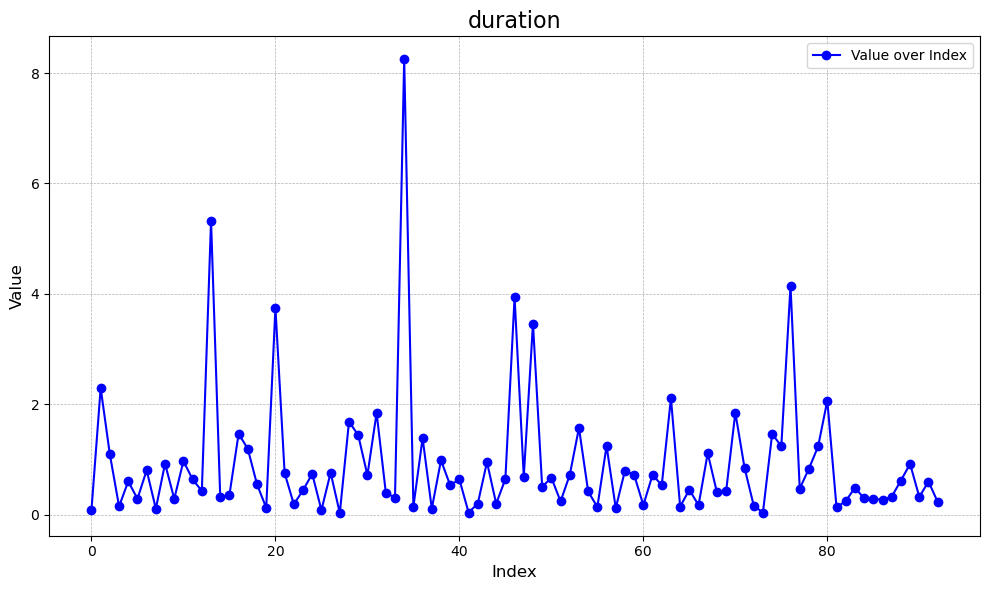

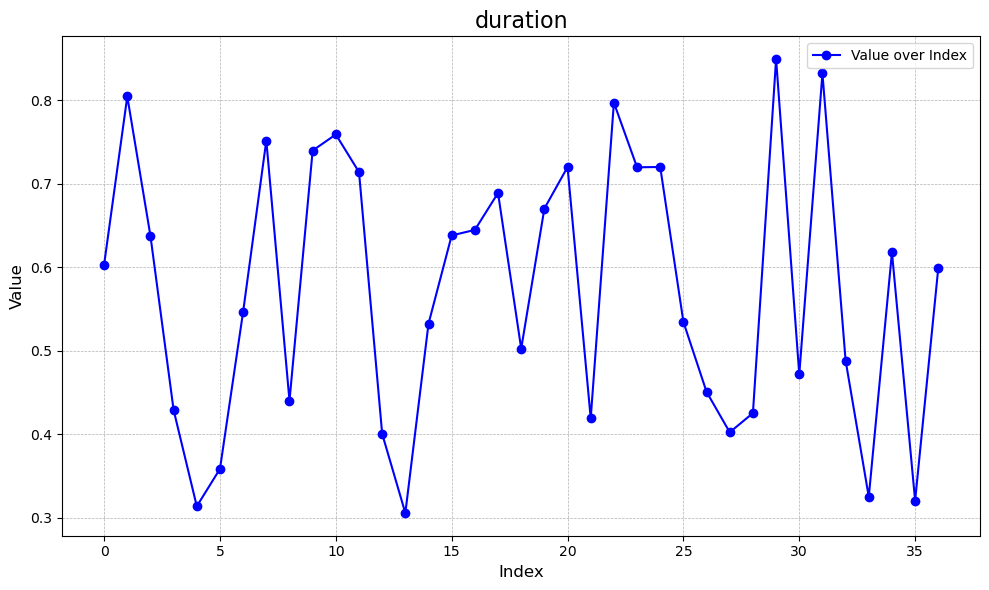

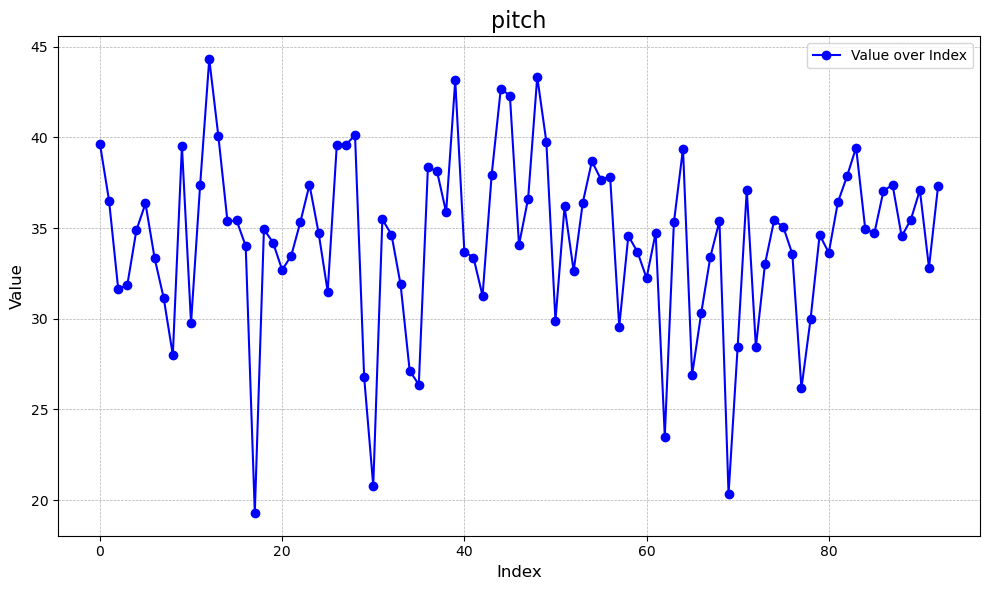

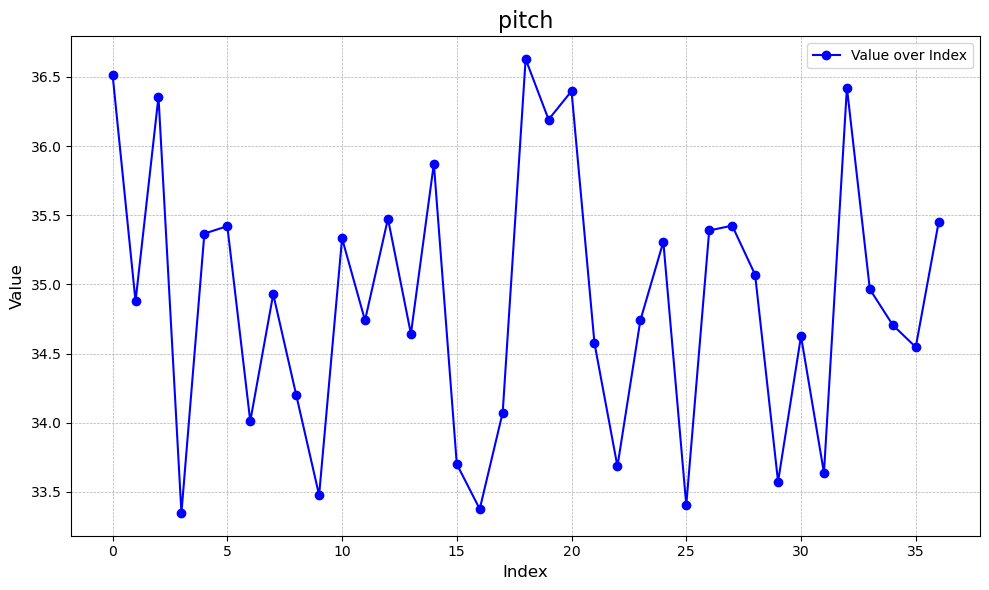

written:  MIDI-Unprocessed_Chamber5_MID--AUDIO_18_R3_2018_wav--1.midi
written:  MIDI-Unprocessed_Chamber6_MID--AUDIO_20_R3_2018_wav--2.midi
written:  MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi
written:  MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--1.midi
written:  MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--5.midi
written:  MIDI-Unprocessed_Recital12_MID--AUDIO_12_R1_2018_wav--3.midi
written:  MIDI-Unprocessed_Recital13-15_MID--AUDIO_13_R1_2018_wav--3.midi
written:  MIDI-Unprocessed_Recital13-15_MID--AUDIO_15_R1_2018_wav--4.midi
written:  MIDI-Unprocessed_Recital17-19_MID--AUDIO_18_R1_2018_wav--2.midi
written:  MIDI-Unprocessed_Recital17-19_MID--AUDIO_19_R1_2018_wav--6.midi
written:  MIDI-Unprocessed_Recital5-7_MID--AUDIO_06_R1_2018_wav--2.midi
written:  MIDI-Unprocessed_Recital5-7_MID--AUDIO_06_R1_2018_wav--3.midi
written:  MIDI-Unprocessed_Recital5-7_MID--AUDIO_07_R1_2018_wav--2.midi
written:  MIDI-Unprocessed_Recital9-11_MID--AUDIO_09_R1_2018_

In [12]:
from random import randrange

final_durations, min_duration, max_duration = central_filter(values_duration, 0.4)
final_pitchs, min_pitch, max_pitch = central_filter(values_pitch, 0.4)
bin_durations = (values_duration >= min_duration) & (values_duration <= max_duration) 
bin_pitchs = (values_pitch >= min_pitch) & (values_pitch <= max_pitch)
selected = np.multiply(bin_durations, bin_pitchs)
print(selected)
count_selected = len(selected[selected == True])
print(count_selected, " selected.")
plot_values(values_duration, title ="duration")
plot_values(final_durations, title ="duration")
plot_values(values_pitch, title ="pitch")
plot_values(final_pitchs, title ="pitch")


written_counter = 0
#interval = (int)(count_selected*10/counter)
#print(interval, count_selected, counter)
for i in range(len(midi_data)):
    #num = randrange(interval)
    if selected[i] :
        written_counter += 1
        midi_data[i].write("raw/maestro-v3.0.0/selected_2018/" + file_names[i])
        print("written: ", file_names[i])
print(written_counter, " written")        